In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_columns",100)

In [2]:
# Importing the dataset
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
titanic = pd.concat([train, test])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Creating copy of the dataset
dataset = titanic.copy()
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking variable relationships with target

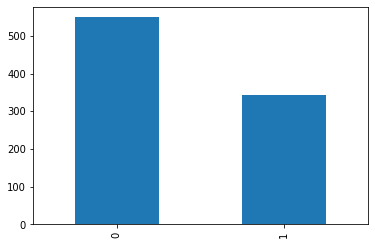

In [4]:
# Checking sampling in target var.
train['Survived'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E45C7B5C8>,
      dtype=object)

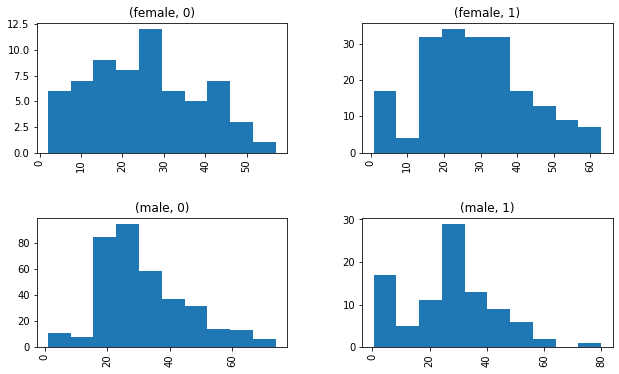

In [5]:
# Checking distributin of female & Survived in Age.
train.hist(column = 'Age', grid=False, by = ['Sex','Survived'],figsize=(10,6))

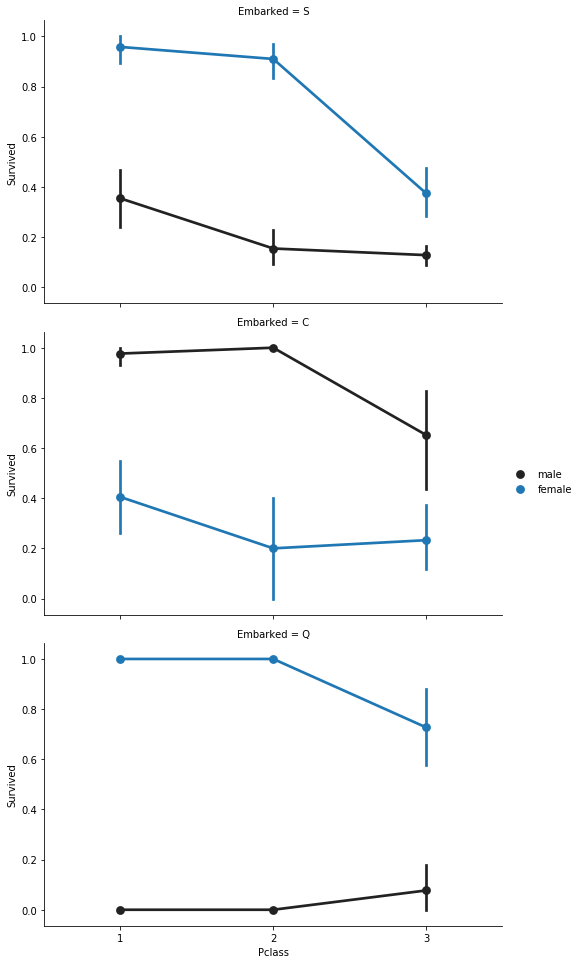

In [6]:
# Checking which embarked have less survival rate
FacetGrid = sns.FacetGrid(train,row = 'Embarked', height = 4.5, aspect = 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',palette=None,  order=None, hue_order=None)
FacetGrid.add_legend()

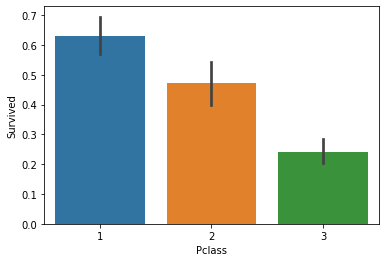

In [7]:
# Checking which class has higher survival rate
sns.barplot(x='Pclass', y = 'Survived', data=train)

C:\Users\sahil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


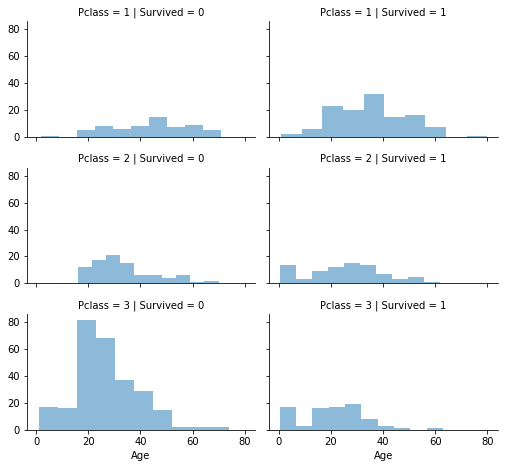

In [8]:
grid = sns.FacetGrid(train, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha=.5)
grid.add_legend();

In [9]:
train['Familymem'] = train['SibSp'] + train['Parch']

C:\Users\sahil\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


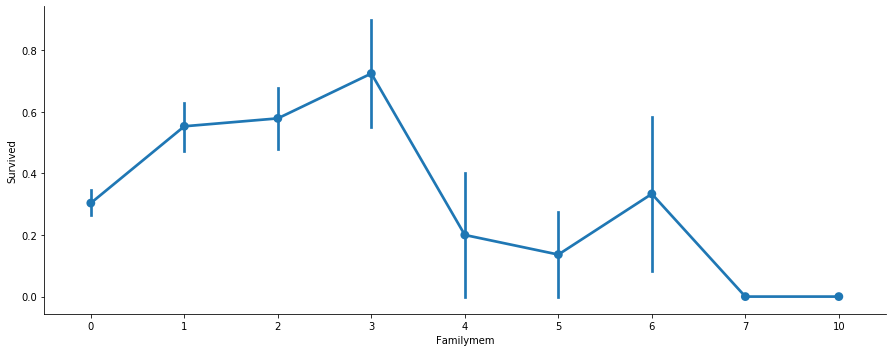

In [10]:
sns.factorplot('Familymem','Survived',kind='point', data=train, aspect=2.5)

In [11]:
# Data Preprocessing

### Feature Engineering

In [12]:
dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
dataset['Title'] = dataset['Title'].replace(['Mlle','Ms','Mme'], 'Miss')
dataset['Title'] = dataset['Title'].replace(['Dr','Rev','Col','Major', 'Dona','Jonkheer','Sir','Don','Countess',\
                                             'Lady','Capt'],'Rare')
dataset.drop(columns = 'Name', inplace=True)

In [13]:
mean = dataset['Age'].mean()
std = dataset['Age'].std()
isna = dataset['Age'].isna().sum()
rand_age = np.random.randint(low = mean-std, high = mean+std, size = isna)
dataset['Age'][np.isnan(dataset['Age'])] = rand_age
dataset['Age'] = dataset['Age'].astype(int)

C:\Users\sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
dataset['Age_group']= pd.qcut(x = dataset['Age'], q = 6)

In [15]:
# Embarked
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [16]:
# Fare
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())

In [17]:
# Cabin
dataset['Cabin'] = dataset['Cabin'].fillna('None')
dataset['Deck'] = dataset['Cabin'].str.extract('([A-Za-z])')[0]
dataset.drop(columns = 'Cabin', inplace=True)

In [18]:
dataset.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Age_group        0
Deck             0
dtype: int64

In [19]:
# Generating new feature
dataset['Totmembers'] = dataset['SibSp'] + dataset['Parch']

In [20]:
dataset['IsAlone'] = dataset['Totmembers'] < 1

In [21]:
# Modifying ticket column
new_col = dataset['Ticket'].str.split(expand=True)[0]
new_col = new_col.str.extract('([^A-Za-z]*)')[0].unique()
int_ticket = pd.DataFrame(new_col).iloc[1:,0].tolist()
dataset['Ticket'] = dataset['Ticket'].str.split(expand=True)[0].replace(int_ticket,'Other')
In_tws = ['SOTON/O.Q.', 'STON/O', 'W./C.', 'A/5', 'CA.', 'SC/PARIS', 'A/5.', 'CA']
In_ones = dataset['Ticket'].value_counts().index[11:].tolist()
dataset['Ticket'] = dataset['Ticket'].replace(In_tws, 'In_tws').replace(In_ones, 'In_ones')

In [22]:
# Creating category of Fare
dataset['Fare'] = dataset['Fare'].astype(int)
dataset['Fare_group'] = pd.qcut(dataset['Fare'], q=5)

In [23]:
dataset.drop(columns = ['Age','Fare'], inplace=True)

In [24]:
ntrain = train.shape[0]
ntest = test.shape[0]

### LabelEncoder

In [26]:
# Converting characters into numbers
le_cols = ['Sex', 'Ticket', 'Embarked', 'Title', 'Age_group', 'Deck', 'IsAlone', 'Fare_group']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in le_cols:
    le.fit(list(dataset[i].values))
    dataset[i] = le.transform(list(dataset[i].values))

In [27]:
# Sex = 1 - male, 0 - female
# Ticket = 2 - In_tws, 4 - PC, 1 - In_ones, 3 - Other
# Embarked = 2 - S, 0 - C
# Title = 2- Mr, 3 - Mrs, 1 - Miss, 0 - Master, 4 - Rare
# Age_group = 1 - (18.0, 23.0], 4 - (34.0, 42.0], 2 - (23.0, 28.0], 3 - (28.0, 34.0], 0 - (-0.001, 18.0]
# Deck = N - 1, C - 0
# Fare_group = 0 - (-0.001, 7.0], 4 - (41.0, 512.0], 1 - (7.0, 10.0], 3 - (21.0, 41.0]

In [28]:
X_train = dataset.iloc[:ntrain, 2:]
y_train = dataset.iloc[:ntrain,1].astype(int)
X_test = dataset.iloc[ntrain:, 2:]

### Run the model

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred_lr = classifier.predict(X_test)
train_score_lr = round(classifier.score(X_train, y_train)*100,2)

In [31]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
y_pred_knn = knn.predict(X_test)
train_score_knn = round(knn.score(X_train, y_train)*100,2)

In [33]:
# SVM
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=0)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
y_pred_svc = svc.predict(X_test)
train_score_svc = round(svc.score(X_train, y_train)*100,2)

In [35]:
# Kernel SVM
ksvc = SVC(random_state=0)
ksvc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
y_pred_ksvc = ksvc.predict(X_test)
train_score_ksvc = round(ksvc.score(X_train, y_train)*100,2)

In [37]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
y_pred_nb = nb.predict(X_test)
train_score_nb = round(nb.score(X_train, y_train)*100,2)

In [39]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [40]:
y_pred_dt = dt.predict(X_test)
train_score_dt = round(dt.score(X_train, y_train)*100,2)

In [41]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [42]:
y_pred_rfc = rfc.predict(X_test)
train_score_rfc = round(rfc.score(X_train, y_train)*100,2)

In [43]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
y_pred_xgb = xgb.predict(X_test)
train_score_xgb = round(xgb.score(X_train, y_train)*100,2)

In [45]:
col = ['LR', 'KNN', 'SVM', 'K-SVM', 'NB', 'DT', 'RF', 'XGB']
train_score = [train_score_lr, train_score_knn, train_score_svc, train_score_ksvc, train_score_nb, train_score_dt, \
               train_score_rfc, train_score_xgb]
pd.DataFrame(train_score,col).rename(columns = {0 : 'Score'}).sort_values(by = 'Score',ascending=False)

,Score
DT,93.71
RF,93.71
XGB,86.42
KNN,84.62
K-SVM,83.28
LR,79.91
SVM,79.12
NB,78.45


In [1]:
# We selected Random Forest Classifier to further evaluation

In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8013982521847691
0.053657015507405155


In [47]:
pd.DataFrame(rfc.feature_importances_, index = X_train.columns).rename(columns = {0 : 'Imp.'})\
                    .sort_values('Imp.', ascending=False)

,Imp.
Sex,0.227741
Age_group,0.139896
Title,0.125474
Fare_group,0.107184
Pclass,0.079445
Deck,0.078454
Totmembers,0.060597
Ticket,0.052622
Embarked,0.045544
SibSp,0.040612


In [48]:
# Dropping less important features
X_train.drop(columns = ['IsAlone','Parch'], inplace=True)
X_test.drop(columns = ['IsAlone', 'Parch'], inplace=True)

In [49]:
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.9371492704826038

In [52]:
# Selecting best parameters in the Random Forest Classifier
parameters = {'criterion': ['gini', 'entropy'],  'min_samples_split' : [1,5,10,20,30,40,50],\
                'min_samples_leaf': [1,10,20,40,70,80,90],'n_estimators' : [100,200,400,600,700,900]}

rf = RandomForestClassifier(n_estimators = 100, max_features='auto', oob_score=True, random_state = 0, n_jobs = -1)
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator = rf,
                         param_grid = parameters,
                         scoring = 'accuracy',
                         cv = 10,
                         n_jobs = -1)
gridsearch.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'bestparams'

In [53]:
gridsearch.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'n_estimators': 100}

In [54]:
rfc = RandomForestClassifier(n_estimators = 100, min_samples_split = 50 , min_samples_leaf = 1, criterion = 'entropy',\
                             oob_score = True, random_state = 0, n_jobs = -1)
rfc.fit(X_train, y_train)
rfc.oob_score_

0.8260381593714927

In [56]:
main_pred = rfc.predict(X_test)

In [66]:
submission = pd.concat([pd.DataFrame(test['PassengerId']), pd.DataFrame(main_pred)], axis = 1).rename(columns = {0 : 'Survived'})

In [68]:
submission.to_csv('submission.csv', index=False)